In [20]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


conn = sqlite3.connect("kbo_database.db")
cursor = conn.cursor()

df = pd.read_sql_query("SELECT * FROM main", conn)
print(df.head())

  EnterpriseNumber                          company_name sector  \
0     0200.065.765  Intergemeentelijke Vereniging Veneco      8   
1     0200.065.765  Intergemeentelijke Vereniging Veneco      7   
2     0200.065.765  Intergemeentelijke Vereniging Veneco      6   
3     0200.065.765  Intergemeentelijke Vereniging Veneco      8   
4     0200.065.765  Intergemeentelijke Vereniging Veneco      4   

        province Zipcode Classification   StartDate  private_public  
0  East Flanders    9070           MAIN  09-08-1960               6  
1  East Flanders    9070           MAIN  09-08-1960               1  
2  East Flanders    9070           MAIN  09-08-1960               1  
3  East Flanders    9070           MAIN  09-08-1960               6  
4  East Flanders    9070           MAIN  09-08-1960               1  


In [25]:
sector_labels = {
    '1': 'Agriculture',
    '2': 'Industry',
    '3': 'Construction',
    '4': 'Wholesale & Retail',
    '5': 'Transport & Hospitality',
    '6': 'Information & Communication',
    '7': 'Finance & Real Estate',
    '8': 'Professional Services',
    '9': 'Public & Other Services'
}

pivot = df['sector_label'].value_counts().reset_index()
pivot.columns = ['Sector', 'Count']
print(pivot)



                        Sector   Count
0           Wholesale & Retail  903485
1        Finance & Real Estate  488231
2        Professional Services  416278
3  Information & Communication  410448
4      Public & Other Services  347514
5      Transport & Hospitality  320654
6                  Agriculture  196518
7                     Industry   72937
8                 Construction   47194


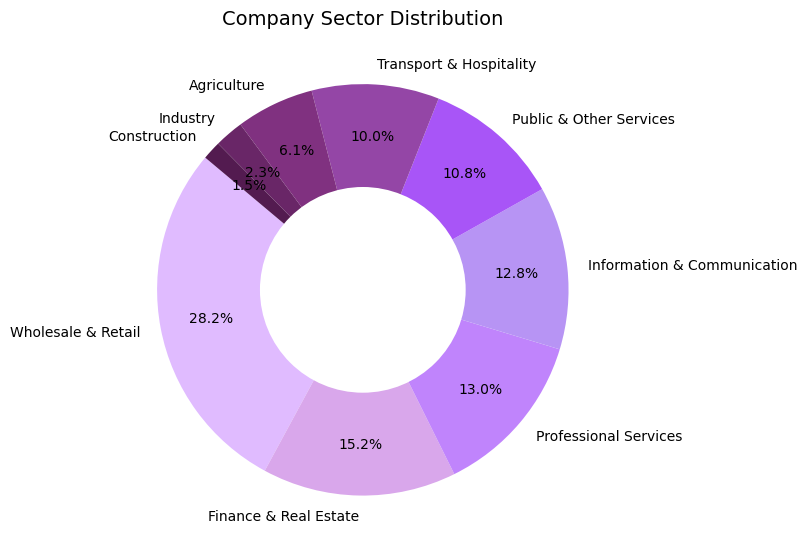

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Créer le pivot (si pas déjà fait)
pivot = df['sector_label'].value_counts().reset_index()
pivot.columns = ['Sector', 'Count']

# Palette personnalisée (mauves / bordeaux doux)
custom_colors = [
    '#e0bbff',  # light lavender
    '#d9a7eb',  # pale mauve
    '#c084fc',  # soft violet
    '#b794f4',  # pastel purple
    '#a855f7',  # stronger violet
    '#9446a6',  # mauve
    '#803180',  # prune
    '#692667',  # bordeaux foncé
    '#531b50'   # deep wine
]

# Tracer le donut chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    pivot['Count'],
    labels=pivot['Sector'],
    colors=custom_colors[:len(pivot)],
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.75,
    textprops={'fontsize': 10}
)

# Ajouter un cercle blanc au centre pour le "creux"
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig.gca().add_artist(centre_circle)

# Titre et style
plt.title("Company Sector Distribution", fontsize=14)
plt.tight_layout()
plt.show()


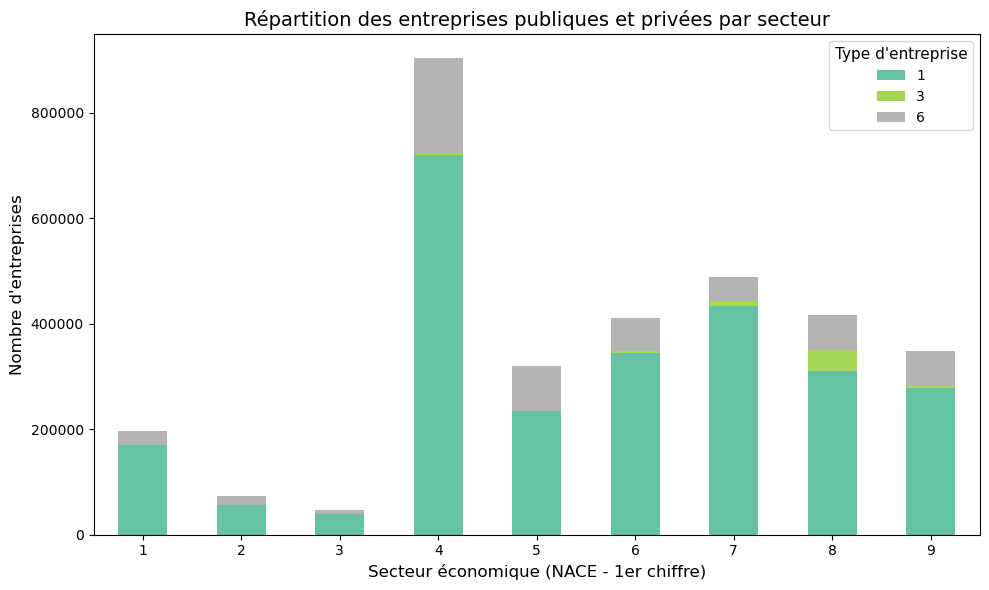

private_public       1      3       6
Sector                               
1               169356      0   27162
2                55860      8   17069
3                39492      9    7693
4               720539    402  182544
5               233755    171   86728
6               343877   5140   61431
7               434216   8120   45895
8               309630  41172   65476
9               278935   2091   66488


In [14]:
# Nb enterprises/sectors

pivot = pd.crosstab(df['sector'], df['private_public'])

pivot.index.name = 'Sector'

pivot.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')

plt.title("Répartition des entreprises publiques et privées par secteur", fontsize=14)
plt.xlabel("Secteur économique (NACE - 1er chiffre)", fontsize=12)
plt.ylabel("Nombre d'entreprises", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Type d'entreprise", title_fontsize=11)
plt.tight_layout()
plt.show()

print(pivot)

In [ ]:
pivot = pd.crosstab(df['sector'], df['private_public'])

# Renommer les colonnes pour afficher clairement
pivot.columns = ['Private', 'Public']  # Remplace selon les valeurs exactes dans ta colonne 'private_public'

# Renommer l'index (axe X)
pivot.index.name = 'Secteur économique'

# Affichage du tableau
print(pivot)

ValueError: Length mismatch: Expected axis has 3 elements, new values have 2 elements

In [16]:
pivot = pd.crosstab(df['sector_label'], df['province'])
print(pivot)

province        Antwerp  Brussels  East Flanders  Flemish Brabant  Hainaut  \
sector_label                                                                 
Administration    24047     27015          17244            22644    14575   
Agriculture       13013      3534          11730            13518    10497   
Commerce         107499     67286          84432           119092    58640   
Construction       5769      2232           4056             5003     2339   
Finance           67777     48784          47817            63609    20302   
Industrie          8663      2571           7608             9486     5906   
Information       64759     46692          46625            61964    21669   
Services pro.     35296     26327          27331            38268    18475   
Transport         44380     33950          28056            37651    21376   

province        Liège  Namur  Unknown  Walloon Brabant  West Flanders  
sector_label                                                         

In [18]:

province_to_region = {
    'Brussels': 'Bruxelles',
    'Walloon Brabant': 'Wallonia',
    'Liège': 'Wallonia',
    'Namur': 'Wallonia',
    'Hainaut': 'Wallonia',
    'Flemish Brabant': 'Flandre',
    'Antwerp': 'Flandre',
    'West Flanders': 'Flandre',
    'East Flanders': 'Flandre'
}

df['region'] = df['province'].map(province_to_region)

region_sector_counts = df.groupby(['region', 'sector_label']).size().reset_index(name='count')

total_per_region = region_sector_counts.groupby('region')['count'].transform('sum')
region_sector_counts['percentage'] = (region_sector_counts['count'] / total_per_region * 100).round(1)

top5_by_region = {}

for region in region_sector_counts['region'].unique():
    top_sectors = (
        region_sector_counts[region_sector_counts['region'] == region]
        .nlargest(5, 'count')
        .reset_index(drop=True)
    )
    top5_by_region[region] = top_sectors

for region, df_top in top5_by_region.items():
    print(f"\n📍 Top 5 secteurs en {region} :\n")
    print(df_top[['sector_label', 'count', 'percentage']].rename(columns={
        'sector_label': 'Secteur',
        'count': 'Nombre',
        'percentage': '% Région'
    }))



📍 Top 5 secteurs en Bruxelles :

          Secteur  Nombre  % Région
0        Commerce   67286      26.0
1         Finance   48784      18.9
2     Information   46692      18.1
3       Transport   33950      13.1
4  Administration   27015      10.5

📍 Top 5 secteurs en Flandre :

         Secteur  Nombre  % Région
0       Commerce  385901      30.7
1        Finance  215481      17.1
2    Information  213957      17.0
3      Transport  137195      10.9
4  Services pro.  123680       9.8

📍 Top 5 secteurs en Wallonia :

         Secteur  Nombre  % Région
0       Commerce  153004      31.7
1        Finance   72359      15.0
2    Information   64961      13.5
3      Transport   55739      11.6
4  Services pro.   50805      10.5


In [21]:
pivot_sector = df['sector_en'].value_counts().reset_index()
pivot_sector.columns = ['Sector', 'Count']

print(pivot_sector)




KeyError: 'sector_en'